<a href="https://colab.research.google.com/github/diego2017003/Projeto_final_ML/blob/main/ProjetoFinal_ImersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução do Projeto
---
O projeto desenvolvido neste *jupyter Notebook* tem por objetivo analisar a relação entre os valores de expressão gênica relacionada a uma droga e os efeitos que esses valores de expressão ativam. Dessa forma o projeto tenta prever parte da tabela resultado disponibilizada pela alura neste [link do github](https://github.com/alura-cursos/imersao-dados-desafio-final/tree/main/Dados).  
Tanto os dados dos genes quanto o resultado das drogas que são utilizados foram retirados do dataset citado no link anterior. O link possui dois datasets distintos e relacionados entre si, um deles contendo: valores de expressões genicas, tipos celulares, e condições experimentais de tempo, dosagem e o grupo da droga(dividido em 'com_droga' e 'com_controle'); O outro dataset apresenta os identificadores das drogas utilizadas e os efeitos que aquelas drogas alcançaram(Efeitos esses que para fins de proximidade ao conteúdo expresso em aula seram referidos como efeitos MOA no decorrer do projeto).  
O foco escolhido para esse projeto é analisar a tabela de dados experimentais e com ML(*Machine Learning*) tentar recriar a tabela resultado com base nas configurações Gênicas causadas pelas "Drogas" presentes no Dataset.          

#Motivação da escolha dos dados para se trabalhar  
---
Nesse trecho do notebook iremos dar uma breve explicação sobre o porque o trabalho irá focar nos efeitos das drogas sobre a expressão genética.  


##Relações gênicas e celulares

In [3]:
#importando os dados de experimento e bibliotecas python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
#Renomeando os nomes das colunas do dataset para retirar o '-' 
dados = dados.rename(columns=lambda x: "".join(x.split("-")))
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
dResultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dResultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


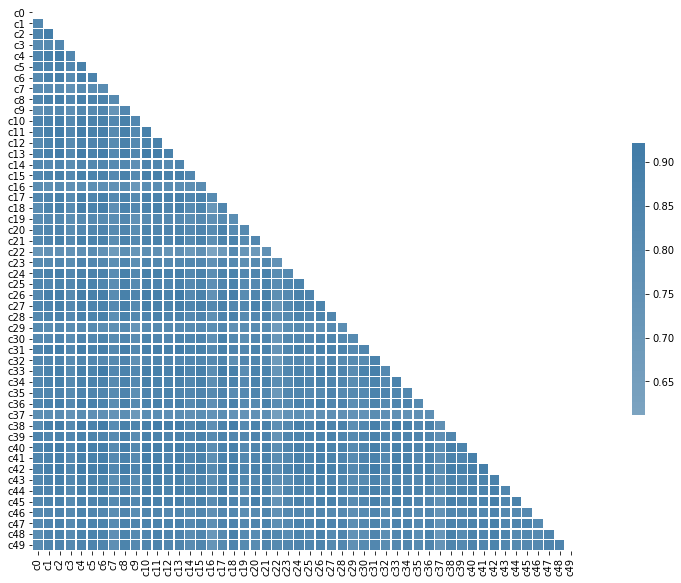

In [20]:
#calculando a correlação dos tipos celulares
correlacao_tipo_celular = dados.loc[:,'c0':'c49'].corr()
# geração da máscara triangular 
mask = np.triu(np.ones_like(correlacao_tipo_celular, dtype=bool))

# Tamanho da figura
f, ax = plt.subplots(figsize=(20, 10))

# gera a paleta de cores para o gráfico
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Imprime o mapa de calor do Seaborn
sns.heatmap(correlacao_tipo_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

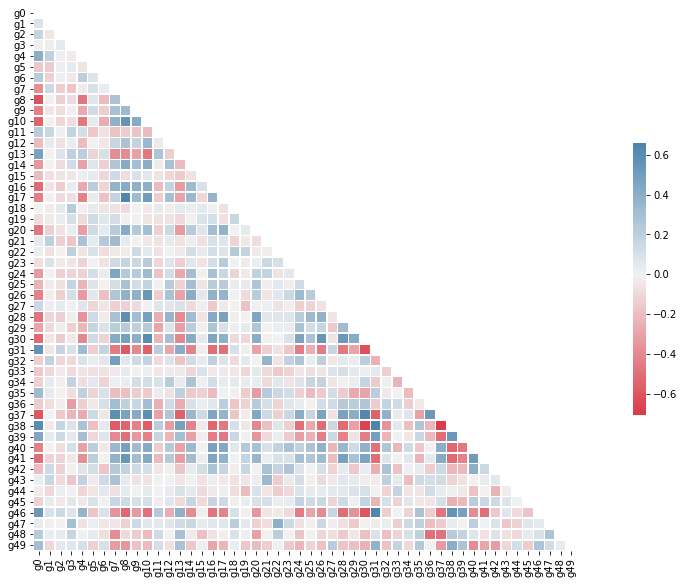

In [21]:
# Calculando a correlação dos genes em grupo de 50
correlacao_genes = dados.loc[:,'g0':'g49'].corr()
# Geração da máscara triangular 
mask = np.triu(np.ones_like(correlacao_genes, dtype=bool))

# Tamanho da imagem a ser exibida
f, ax = plt.subplots(figsize=(20, 10))

# Paleta de cores utilizadas
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Desenho da tabela de correlção como um mapa de calor
sns.heatmap(correlacao_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Selecione um intervalo de genes: 
(1)0-100 
 (2)100-200 
 (3)200-300 
 (4)300-400 
 (5)400-500 
 (6)500-600 
 (7)600-700 
 (8)700-771
2


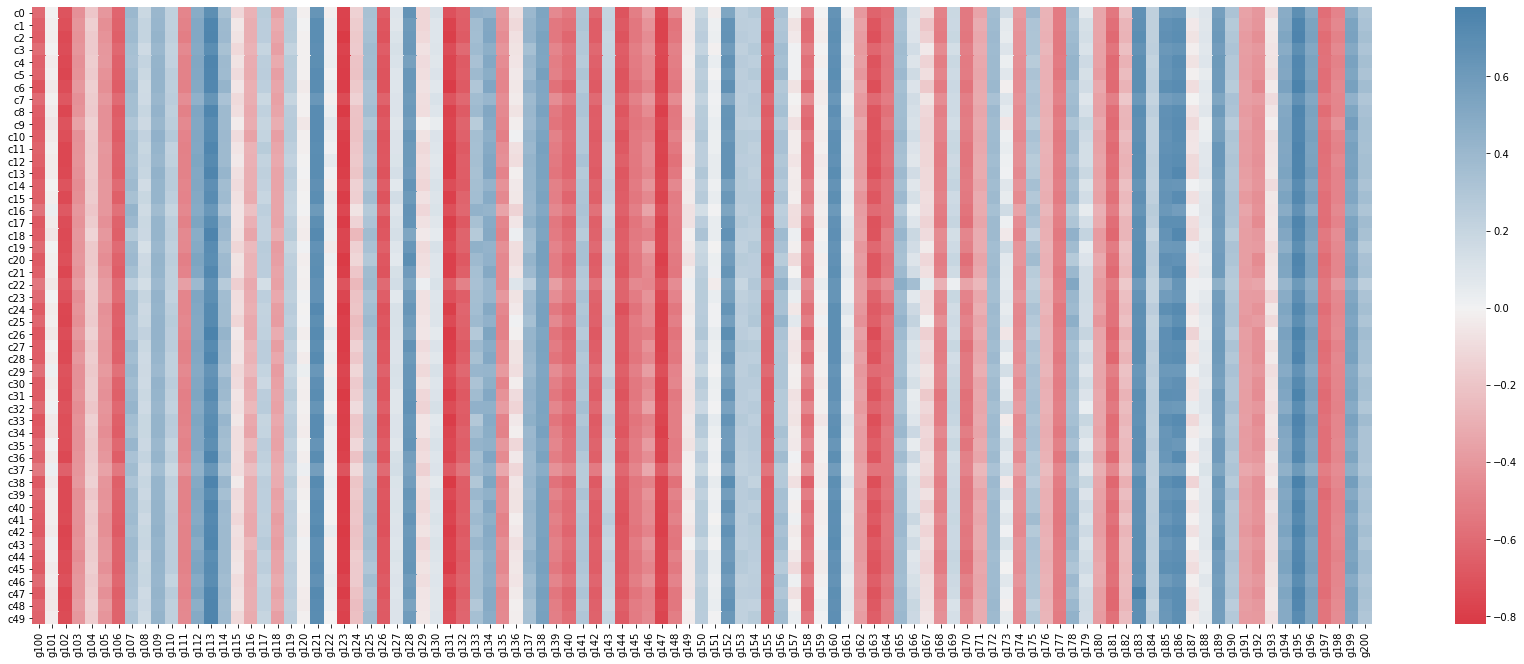

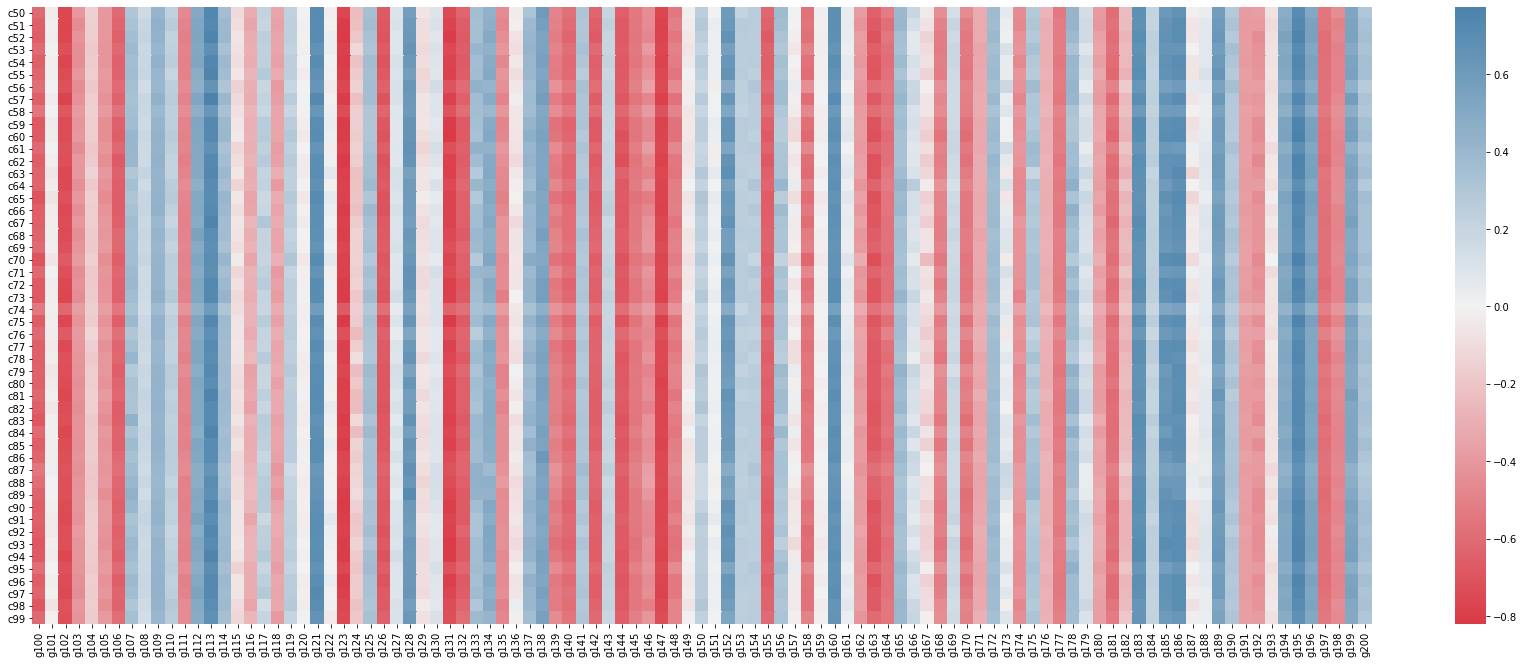

In [12]:
#Esse código é interativo com o usuário que desejar ver o comportamento do conjunto de tipos de células com uma sessão
#do conjunto de genes presentes na tabela. São 7 intervalos de 100 genes e o último intervalo com 772 genes 
print("Selecione um intervalo de genes: \n(1)0-100 \n (2)100-200 \n (3)200-300 \n (4)300-400 \n (5)400-500 \n (6)500-600 \n (7)600-700 \n (8)700-771")
intervalo = int(input())
#breve tratamento do número obtido. o código repetirá a pergunta do intervalo enquanto o número for inválido
#Atenção! não há tratamento de exceção para valores não numéricos 
while intervalo not in range(9):
  print("Selecione um intervalo de genes: \n(1)0-100 \n (2)100-200 \n (3)200-300 \n (4)300-400 \n (5)400-500 \n (6)500-600 \n (7)600-771 \n (8)700-771")
  intervalo = int(input())
if intervalo in range(8):
  g1 = 'g'+(str)(intervalo*100 -100)
  g2 = 'g'+(str)(intervalo*100)
  #seleciona o intervalo de genes
  g1_2 = dados.loc[:,g1:g2]
  #seleciona os 50 primeiro tipos celulares
  c0_50 = dados.loc[:,'c0':'c49']
  #faz a junção das tabelas de genes com as células
  corrgc0_50 = pd.concat([g_249,c0_50], axis=1).corr()
  #seleciona o tamanho da imagem
  plt.figure(figsize=(30, 25))
  #diz que é o gráfico superior de 2 gráficos 
  plt.subplot(2,1,1)
  cmap = sns.diverging_palette(10, 240, as_cmap=True)
  #seleciona apenas a parte da correlação que envolve valores cruzados de genes e células
  corrgc050 = corrgc0_50.loc['c0':'c49',g1:g2]
  #cria o primeiro gráfico heatmap 
  sns.heatmap(corrgc050, cmap=cmap, center=0)

  g200_249 = dados.loc[:,g1:g2]
  c50_99 = dados.loc[:,'c50':'c99']
  corrgc0_50 = pd.concat([g200_249,c50_99], axis=1).corr()
  
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,2)

 
  cmap = sns.diverging_palette(10, 240, as_cmap=True)
  corrgc0_50_99 = corrgc0_50.loc['c50':'c99',g1:g2]
 
  sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)
else:
  g1 = 'g'+(str)(intervalo*100 -100)
  g2 = 'g'+(str)(intervalo*100 - 29)
  g200_249 = dados.loc[:,g1:g2]
  c0_50 = dados.loc[:,'c0':'c49']
  corrgc0_50 = pd.concat([g200_249,c0_50], axis=1).corr()
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,1)

 
  cmap = sns.diverging_palette(10, 240, as_cmap=True)
  corrgc050 = corrgc0_50.loc['c0':'c49',g1:g2]
 
  sns.heatmap(corrgc050, cmap=cmap, center=0)

  g200_249 = dados.loc[:,g1:g2]
  c50_99 = dados.loc[:,'c50':'c99']
  corrgc0_50 = pd.concat([g200_249,c50_99], axis=1).corr()

  
  plt.figure(figsize=(30, 25))
  plt.subplot(2,1,2)

 
  cmap = sns.diverging_palette(10, 240, as_cmap=True)
  corrgc0_50_99 = corrgc0_50.loc['c50':'c99',g1:g2]
  
  sns.heatmap(corrgc0_50_99, cmap=cmap, center=0)

Os três mapas de calor acima demonstram a correlação entre tipos celulares, genes, e uma correlação cruzada entre genes e tipos celulares. é possível observar que apesar de existir correlação entre genes, essas correlações não são tão frequentes e também não há garantia de causalidade, tal que a modificação em um gene seja a causa da modificação em outro gene. Da mesma forma a correlação entre celulas, e a correlação cruzada de genes com células parecem não possuir relação de causalidade, as células por terem correlações muito fortes levam à hipotése de que é devido a um efeito encadeado já que a relação de correlação é de muitos para muitos.    

##Relações gênicas e celulares com condições de experimento  
---
Nessa análise vamos isolar as três drogas que possuem maior ocorrência no dataset, com exceção da primeira por se tratar da substância codificada para a população de amostras destinadas a controle. e com essas substâcias iremos ver como se comporta com relação às variáveis de tempo e dose, comparando ao comportamento das amostras de controle. A analise gráfica será feita com sccatterplot, boxplot, histograma. Os códigos utilizados são baseados nos [desafios da aula 4](https://github.com/diego2017003/ImersaoDados/blob/main/Aula4_ImersaoDados_Desafio.ipynb).  

In [112]:
#Porcentagem dos dados para teste de drogas e porcentagem dos dados de controle
dados['tratamento'].value_counts(normalize="true")

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [23]:
#escolhemos o segundo composto que mais aparece já que o primeiro se trata da classe de controle
contagem_composto = dados['droga'].value_counts() 

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
f2cc15da6       1
809527b9d       1
ddb7e0c01       1
81a463c0a       1
277f1d6f9       1
Name: droga, Length: 3289, dtype: int64

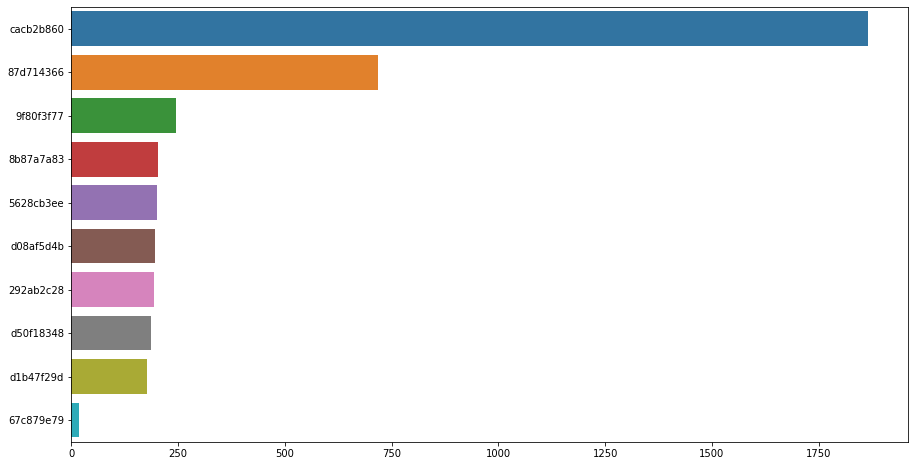

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(y=contagem_composto[:10].index,
            x=contagem_composto[:10].values, orient='h')
ax.set_title("Drogas mais frequentes")
plt.show()

In [71]:
#criando 3 bases de dados filtrando as 3 drogas mais frequentes
dados_Composto1 = dados.loc[dados.droga=='87d714366'] 
dados_Composto2 = dados.loc[dados.droga=='9f80f3f77']
dados_Composto3 = dados.loc[dados.droga=='8b87a7a83']
#Filtragem da base de dados utilizando o composto de controle(maior frequência)
dados_Controle = dados.loc[dados.droga=='cacb2b860']

Escolha um gene(0 a 771):
0


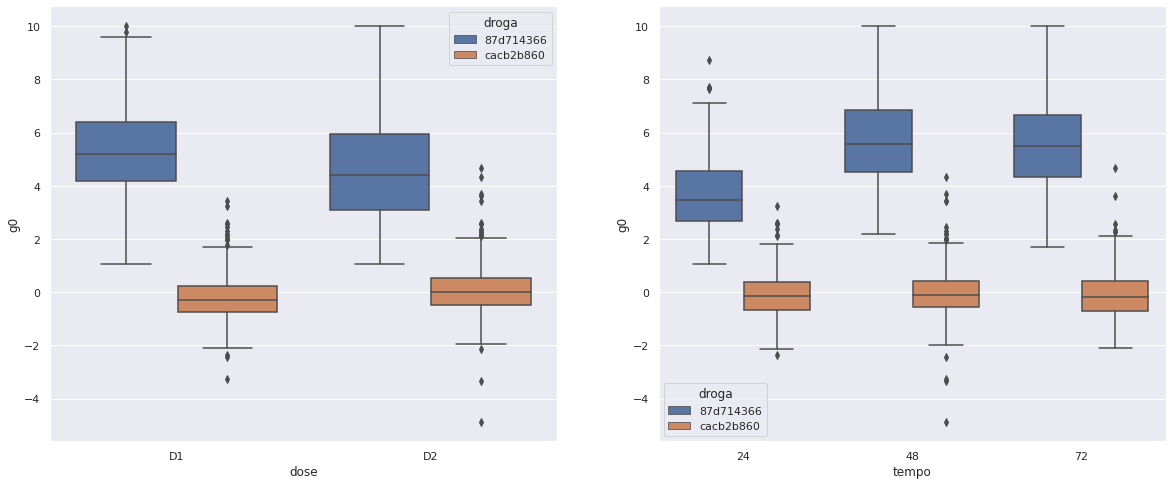

In [72]:
print("Escolha um gene(0 a 771):")
try: n = (int)(input())
except:
    n = 0
gene = "g"+ str(n)
dados_Composto1_Controle = pd.concat([dados_Composto1,dados_Controle],axis=0)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = dados_Composto1_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.boxplot(data = dados_Composto1_Controle, y= gene, x='tempo', hue='droga')

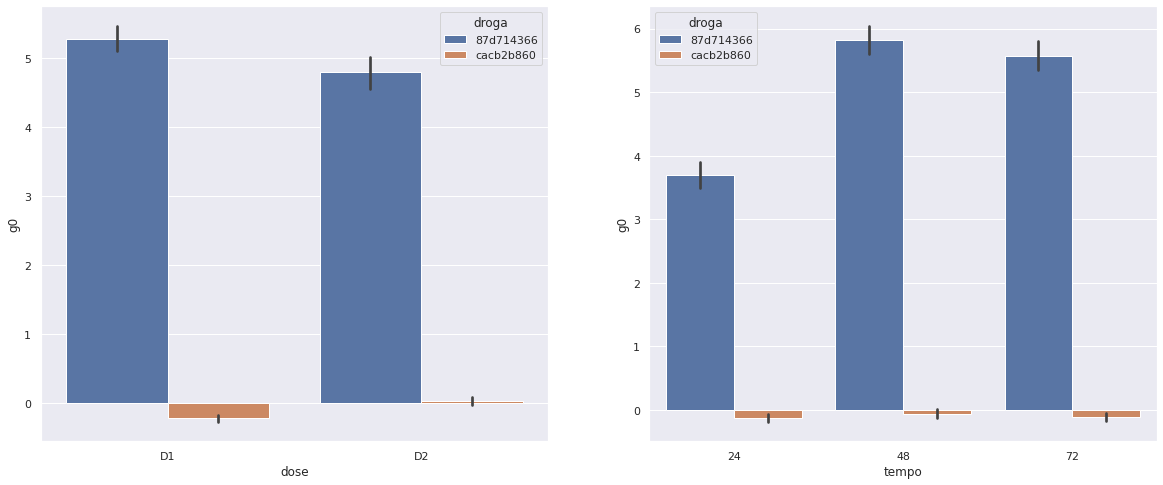

In [73]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data = dados_Composto1_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.barplot(data = dados_Composto1_Controle, y= gene, x='tempo', hue='droga')

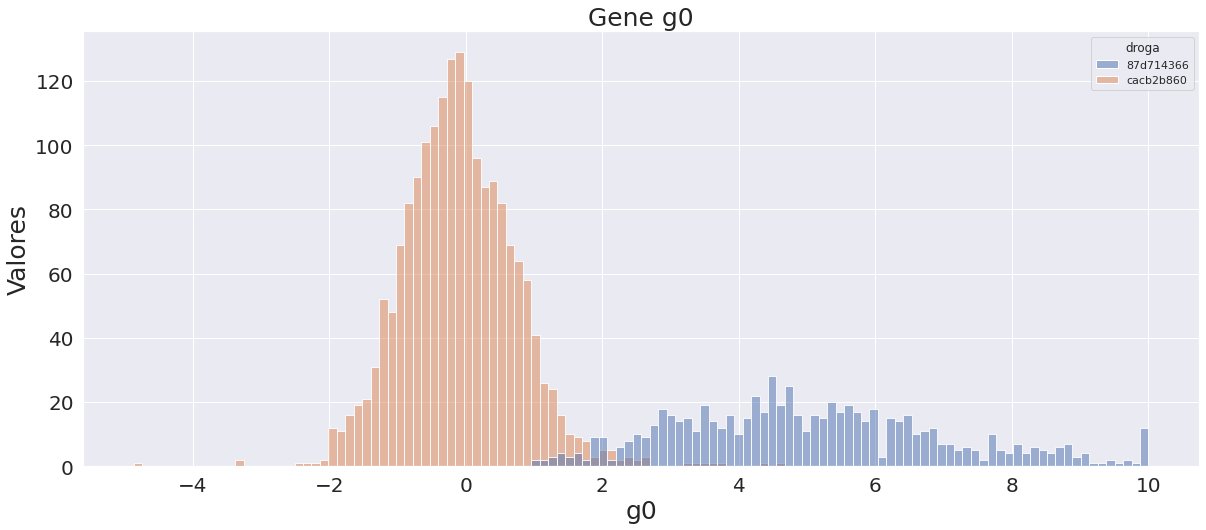

In [74]:
plt.figure(figsize=(20,8))
hg0 = sns.histplot(data=dados_Composto1_Controle,x=gene,color='red',bins=120,hue='droga')
hg0.set_title('Gene '+str(gene),fontdict={'fontsize':25})
hg0.tick_params(labelsize=20)
hg0.set_ylabel("Valores",fontdict={'fontsize':25})
hg0.set_xlabel(str(gene),fontdict={'fontsize':25})
sns.set_theme(font='calibri')

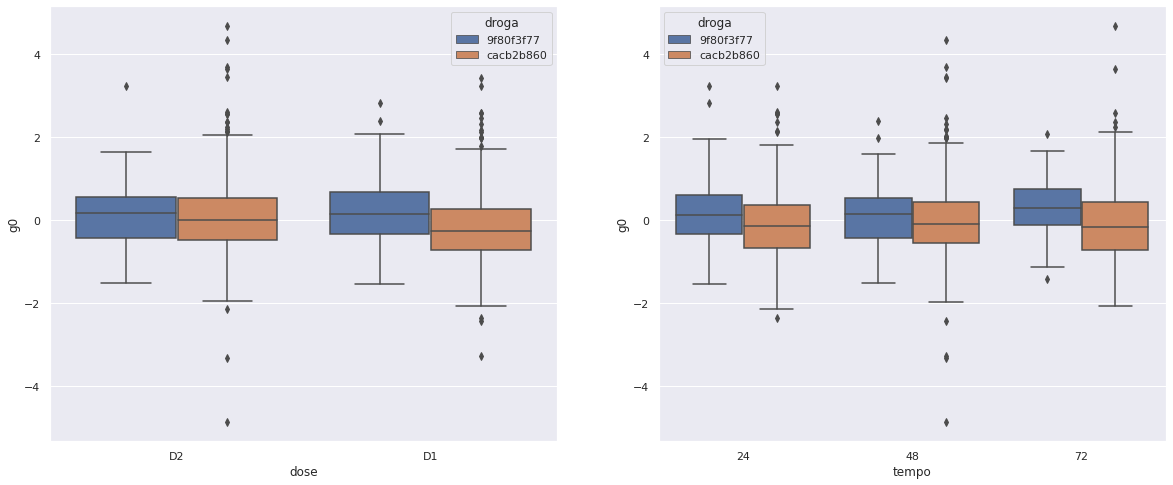

In [97]:
half = (len(dados_Controle))/2
dados_Composto2_Controle = pd.concat([dados_Composto2,dados_Controle.loc[half:]],axis=0)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = dados_Composto2_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.boxplot(data = dados_Composto2_Controle, y= gene, x='tempo', hue='droga')

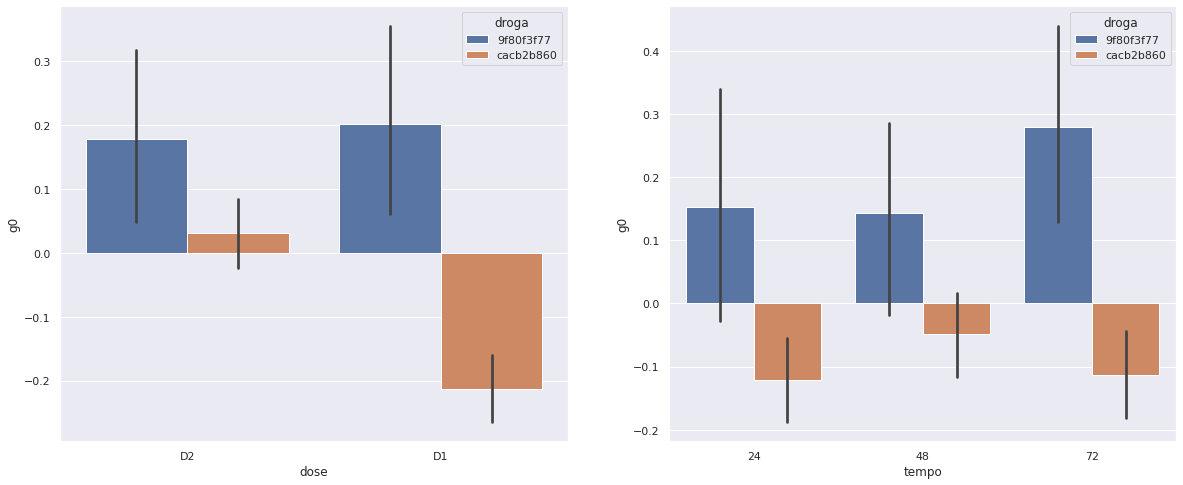

In [98]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data = dados_Composto2_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.barplot(data = dados_Composto2_Controle, y= gene, x='tempo', hue='droga')

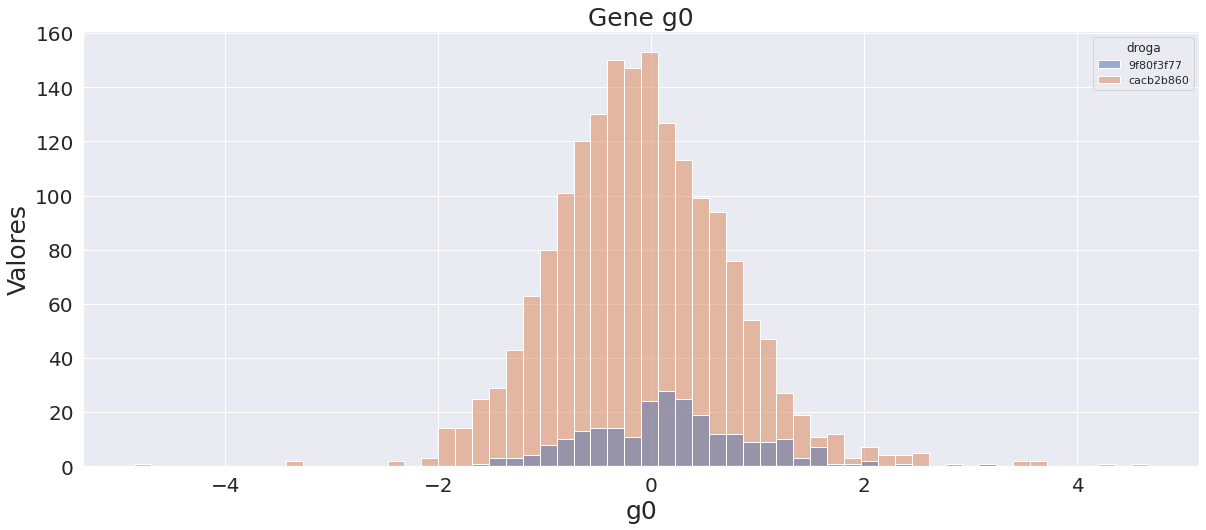

In [99]:
plt.figure(figsize=(20,8))
hg0 = sns.histplot(data=dados_Composto2_Controle,x=gene,color='red',bins=60,hue='droga')
hg0.set_title('Gene '+str(gene),fontdict={'fontsize':25})
hg0.tick_params(labelsize=20)
hg0.set_ylabel("Valores",fontdict={'fontsize':25})
hg0.set_xlabel(str(gene),fontdict={'fontsize':25})
sns.set_theme(font='calibri')

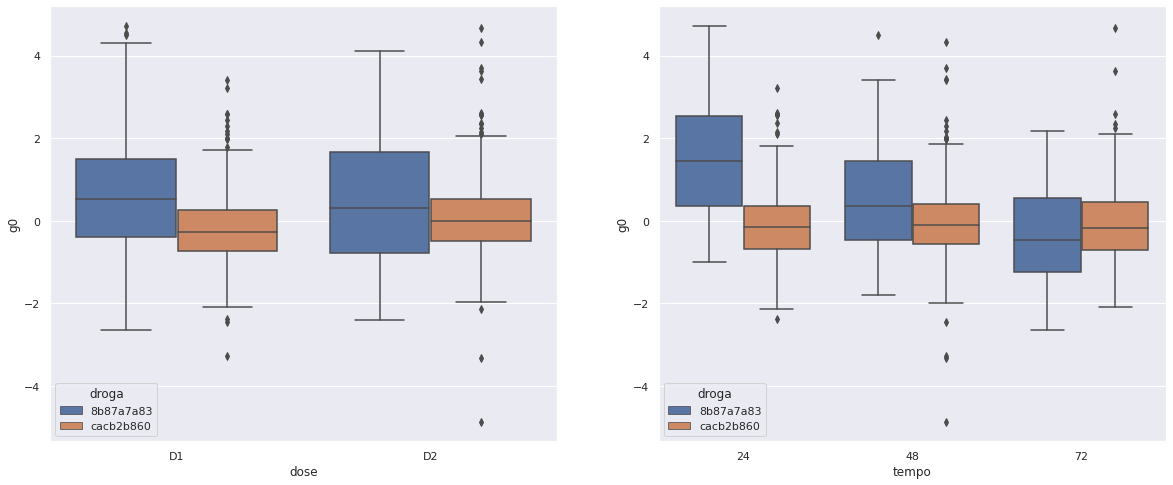

In [108]:
third = 2*(len(dados_Controle))/3
dados_Composto3_Controle = pd.concat([dados_Composto3,dados_Controle.loc[third:]],axis=0)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = dados_Composto3_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.boxplot(data = dados_Composto3_Controle, y= gene, x='tempo', hue='droga')

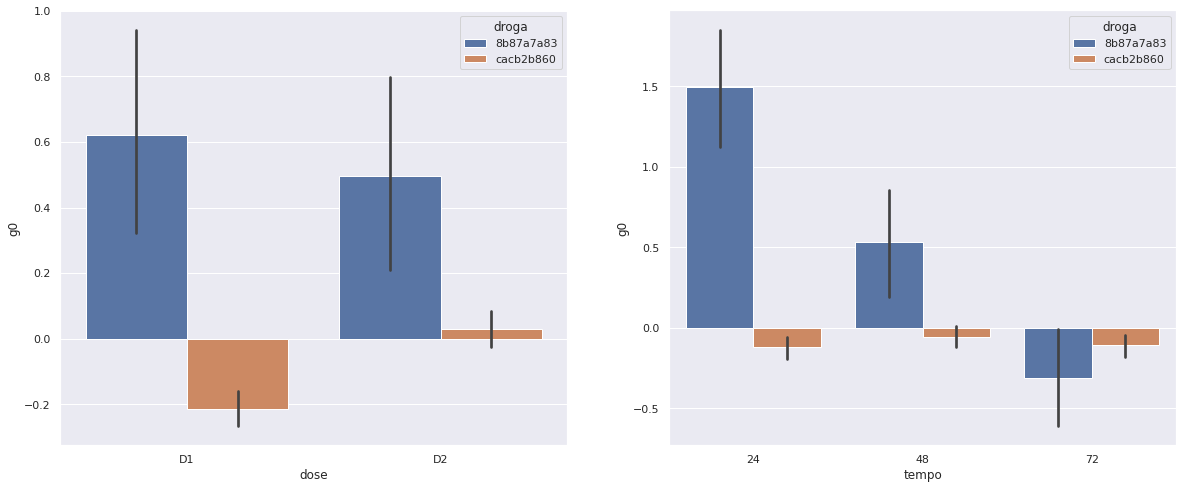

In [109]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(data = dados_Composto3_Controle, y= gene, x='dose', hue='droga')
plt.subplot(1,2,2)
sns.barplot(data = dados_Composto3_Controle, y= gene, x='tempo', hue='droga')

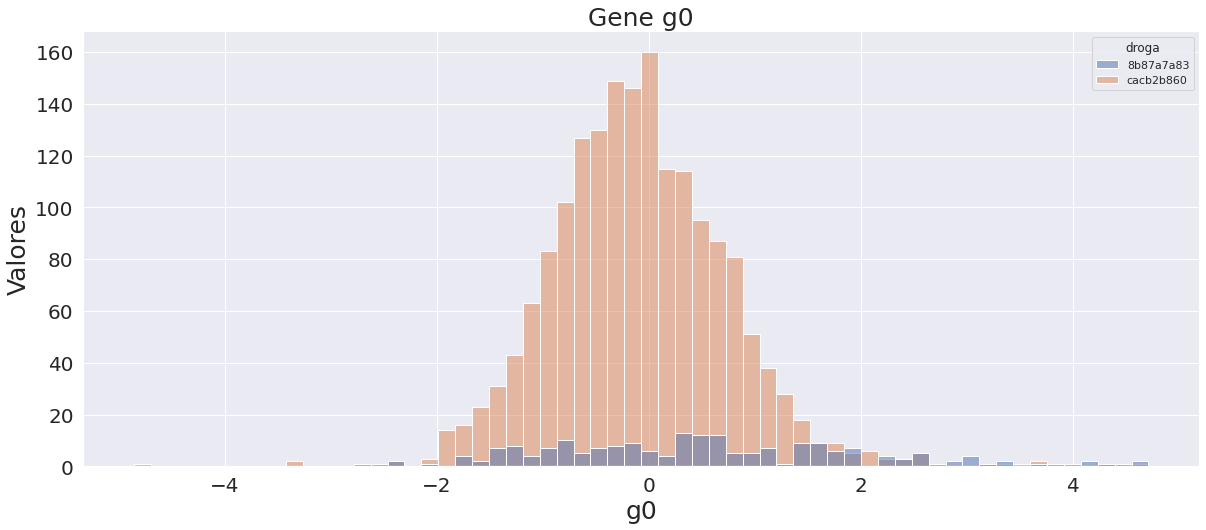

In [110]:
plt.figure(figsize=(20,8))
hg0 = sns.histplot(data=dados_Composto3_Controle,x=gene,color='red',bins=60,hue='droga')
hg0.set_title('Gene '+str(gene),fontdict={'fontsize':25})
hg0.tick_params(labelsize=20)
hg0.set_ylabel("Valores",fontdict={'fontsize':25})
hg0.set_xlabel(str(gene),fontdict={'fontsize':25})
sns.set_theme(font='calibri')

O propósito dos três gráficos é mostrar como está a distribuição das expressões genicas com e sem as drogas testadas no experimento em questão. Para a droga com maior frequência exibimos o gráfico direto utilizando o conjunto total de amostras de controle devido a quantidade de amostras ser relativamente alta. Entretanto, para os compostos 2 e 3 de maior frequência foi necessário um particionamento das amotras de controle para melhorar a distribuição. fizemos um _downsample_ selecionando somente metade das amostras de controle para comparar à droga com segunda maior frequência, e um _downsample_ selecionando somente o último terço das amostras de controle para comparar ao medicamento de terceira maior frequência para uma visualização mais "balanceada".  
Os gráficos mostram que há um desvio na distribuição da expressão genica quando a amostra é submetida a uma droga. Também é possível observar que algumas drogas forçam um desvio maior se comparada a outras.  
Além do que foi exibido no parágrafo anterior. Podemos notar um problema que talvez dificulte a generalização do nosso modelo posteriormente: O desbalanceamento dos dados. Por mais que o conjunto de amostras de controle representem pouco mais de 7% do conjunto de dados como um todo, ao analisar cada droga separadamente com o composto teste os dados tendem a privilegiar a classe de controle.  
Falaremos mais dos problemas encontrados para análise posteriormente nesse notebook. A conclusão dessa análise é que dependendo da droga a expressão genica muda de configuração, sendo essa mudança muito percepitível ou não. Sendo assim, formulamos a pergunta que iremos tentar responder posteriormente nesse notebook: **Com base na expressão genica, seria possível descobrir quais os efeitos a droga está tendo sobre os genes?**  

##Relação entre a visualização e a teoria
---
De acordo com o artigo, disponibilizado junto com a proposta do projeto, e denominado ["Expressão gênica: o caminho da informação biológica"](https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view). A regulação da expressão gênica é a adaptação que a célula faz na produção de determinados tipos de proteína para manter-se em um estado relativamente estável, essa produção de certos tipos de proteínas para regulação de genes pode ser alterada tant por fatores internos(ex:hormônios) quanto externos(medicamentos). Com essa informação e trançando um paralelo ao que foi mostrado nos gráficos, podemos teorizar que o comportamento dos genes ao composto de controle seria a representação normalizada daquele gene, sendo o zero o valor normal representando a não influência de fatores internos ou externos. Em contrapartida, a droga pode influenciar a expressão gênica deslocando o valor normal no gráfico,Seja ele para direita ou esquerda. Não podemos inferir que o aumento da expressão gênica é o deslocamento para esquerda ou direita sem mais informações sobre como foram tratados os dados originais, apenas inferimos que o efeito da droga causa o desvio da cruva de sino no gráfico.     

##Análise sobre os dados dos resultados 

In [113]:
#dados da dataset de resultados alcançados
dResultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A tabela de resultados que observamos acima possui 206 tipos de efeitos que podem ocorrer nos experimentos. O vínculo entre a tabela de experimento e resultados é feito somente com base no identificador de cada experimento(id).  

In [ ]:
#visualizando uma coluna aleatória 
for x in list(dResultados.drop('id',axis=1).columns):
  print(dResultados[x].unique())
#todas as colunas tem valor binário de ocorrência ou não do efeito

In [126]:
#analisando a ocorrência de cada efeito indo do mais recorrente ao menos recorrente
print(dResultados.drop(['id'], axis=1).sum().sort_values(ascending=False).T)


nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64


In [125]:
#analisando a ocorrência de cada efeito indo do mais recorrente ao menos recorrente normalizado
print(dResultados.drop(['id'], axis=1).sum().sort_values(ascending=False).T/(len(dResultados)))

nfkb_inhibitor                                0.034937
proteasome_inhibitor                          0.030486
cyclooxygenase_inhibitor                      0.018267
dopamine_receptor_antagonist                  0.017805
serotonin_receptor_antagonist                 0.016965
                                                ...   
protein_phosphatase_inhibitor                 0.000252
autotaxin_inhibitor                           0.000252
diuretic                                      0.000252
erbb2_inhibitor                               0.000042
atp-sensitive_potassium_channel_antagonist    0.000042
Length: 206, dtype: float64


É possível observar que ao separar um efeito específico, mesmo o mais recorrente, a quantidade de dados com efeito positivo é muito pequeno quando comparado com a quantidade total de experimentos realizados. Isso pode se tornar problemático quando formos criar um modelo de classificação, o desbalanceamento pode levar ao problema de falsos negativos que na contagem total não representem um problema. Quando criamos um modelo com dados desbalanceados, a porcentagem de acerto geral pode ser alta levando a um score próximo de 1, entretanto, ao se analisar detalhadamenta a porcentagem de dados classificados corretamente para cada classe, A porcentagem de acerto sobre a classe com menos dados pode ser baixa quando comparada com a classe mais populosa. Existem [algumas formas de se lidar com o desbalanceamento](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), entretanto, esse notebook não irá lidar com isso.Mas devido o desbalanceamento O projeto irá apenas pegar os efeitos mais populosos para análise e tentar fazer a classificação mais a frente. 

##Mesclando as bases de dados  
---
Nesse bloco iremos criar algumas variáveis para analisar o comportamento conjunto da base de dados experimentais com os dados dos resultados. 


In [127]:
#modificamos a tabela adicionando o parâmetro binário 'ativa_efeitos' para visualizar todos os experimentos que 
#possuíram no mínimo um efeito ativo   
dResultados['ativa_efeitos'] = (dResultados.drop('id', axis=1).sum(axis=1))> 0

In [149]:
dResultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,ativa_efeitos
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [150]:
#verificamos se a variável ativa_efeitos é balanceada
dResultados['ativa_efeitos'].value_counts(normalize='true')


True     0.60666
False    0.39334
Name: ativa_efeitos, dtype: float64

Mesmo sendo desbalanceada, a porcentagem de diferença entre as classes é relativamente baixa quando comparada a outras classes que estamos lidando nesse DataSet

In [132]:
#criamos um terceiro DataFrame que faz a mescla dos 2 efeitos mais recorrentes na tabela de resultados junto 
#à coluna binária representando a ocorrência de efeitos
dados_Experimento_Resultado = pd.merge(dados,dResultados[['id','ativa_efeitos','nfkb_inhibitor','proteasome_inhibitor']],on='id')
dados_Experimento_Resultado.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,ativa_efeitos,nfkb_inhibitor,proteasome_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,True,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,False,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,True,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,False,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,True,0,0


In [145]:
#filtramos os experimentos que não utilizaram drogas e comprovamos a não ativação de efeitos como esperado
dTreino = dados_Experimento_Resultado.loc[dados_Experimento_Resultado.tratamento=='com_controle']
dTreino['ativa_efeitos'].unique()

array([False])

Acima criamos uma terceira base de dados que mescla os dados dos experimentos e os dados dos resultados utilizando um indicador da ocorrência de efeitos nos resultados e também as classes de efeitos com maior número de ocorrências na tabela de resultados.  
  Nos próximos trechos de código iremos lidar com a visualização desses dados em _scatterplots_ com a finalidade analisar se os efeitos com maior ocorrência podem ser uma boa classe de classificação usando como parâmetro visual a separação das classes.  
  Os plots serão feitos da seguinte forma: iremos correlacionar dois genes escolhidos por escolha do autor sem base lógica de escolha no gráfico e aplicaremos um terceiro parâmetro no 'hue' para verificar se os valores de genes, mesmo que sem relação bem definida podem estar relacionados diretamente com a ativação de um efeito retirado da tabela resultado.    
  Como Vimos anteriormente, O parâmetro 'ativa_efeitos' é relativamente balanceado, então iremos fazer o teste de verificar se pode configurar uma classe separável utilizando somente o parâmetro visual do gráfico.  
  A relação entre dois genes e o resultado na classe foi feito da forma como está no notebook por conveniência gráfica, já que o se fossemos relacionar todos os parâmetros de uma vez só o rsultado teria um número de dimensões que não poderia ser representado graficamente. 

##Antes de verificarmos o quão separável são as classes. **O que significa ser separável?**
--- 
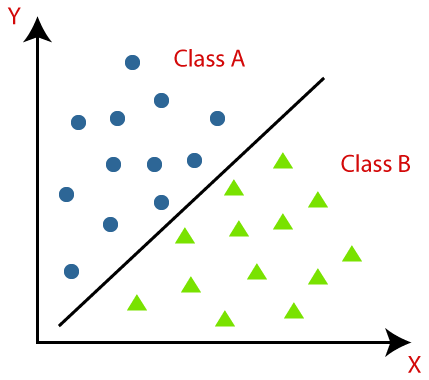  
A figura acima mostra o que seria uma classe separável. Quando trabalhamos com modelos de classificação lineares tentamos criar uma equação matemática que divida o plano de valores do problema em sessões. Essas sessões representam os valores que a saída da nossa inteligência artifical pode assumir após a previsão. Dessa forma quanto melhor o modelo puder definir essas sessões com os valores corretos, melhor será a previsão. Em linhas gerais aplicado ao nosso problema: se ao exibir os valores dos dados que estou utilizando para fazer uma previsão, no nosso problema seria os valores de expressão gênica, se eu aplicar os resultados da classe que estou analisando e conseguir enxergar sessões no plano que tenha predominância de um resultado, e sessões do plano em que o outro resultado predomine; ao conseguir diferenciar sessões para cada resultado eu digo que elas são separáveis e se eu conseguir encontrar uma função linear que sirva de barreira entre as sessões, eu digo que o problema é linearmente separável. Como mostrado na figura, acima da linha todos os valores pertencem à classe A e abaixo da linha todos os valores pertencem à classe B.


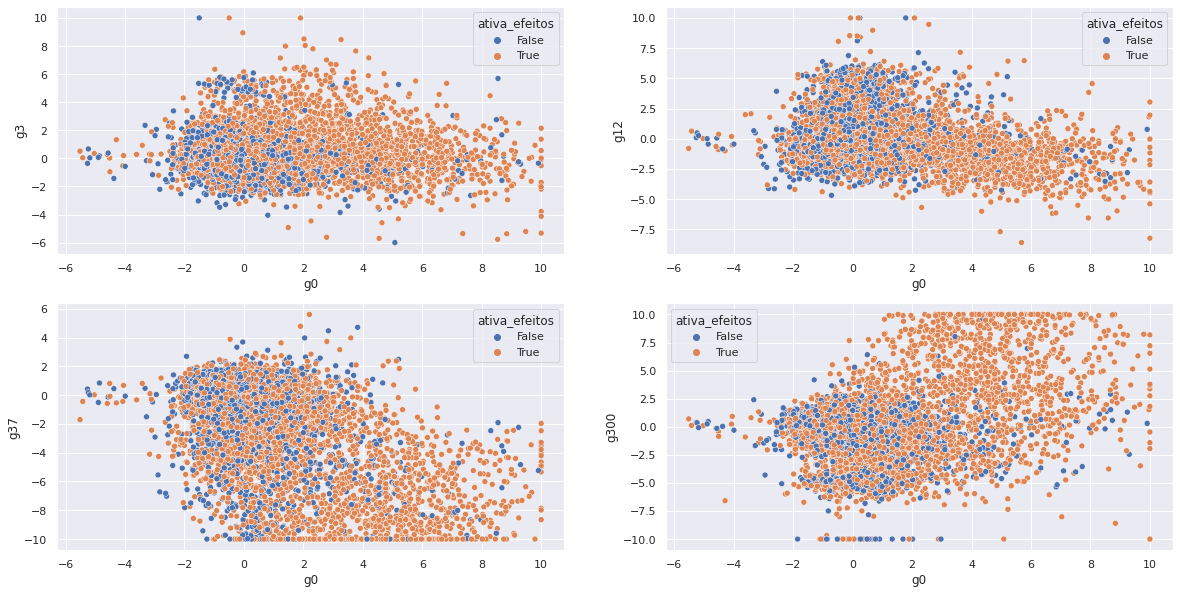

In [153]:
#abaixo são realizados os scatterplot's utilizando como resultado a classe 'ativa_efeitos' 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x='g0', y = 'g3', data=dados_Experimento_Resultado, hue='ativa_efeitos')
plt.subplot(2,2,2)
sns.scatterplot(x='g0', y = 'g12', data=dados_Experimento_Resultado, hue='ativa_efeitos')
plt.subplot(2,2,3)
sns.scatterplot(x='g0', y = 'g37', data=dados_Experimento_Resultado, hue='ativa_efeitos')
plt.subplot(2,2,4)
sns.scatterplot(x='g0', y = 'g300', data=dados_Experimento_Resultado, hue='ativa_efeitos')

Analisando o scatterplot como prâmetro de ativa_efeitos, não conseguimos enxergar sessões bem definidas para os valores de _'True'_  ou os valores de _false_. Por mais que essa classe seja relativamente "balanceada", dificilmente seria possível criar um modelo para diferenciar os valores de _True_ e _False_.

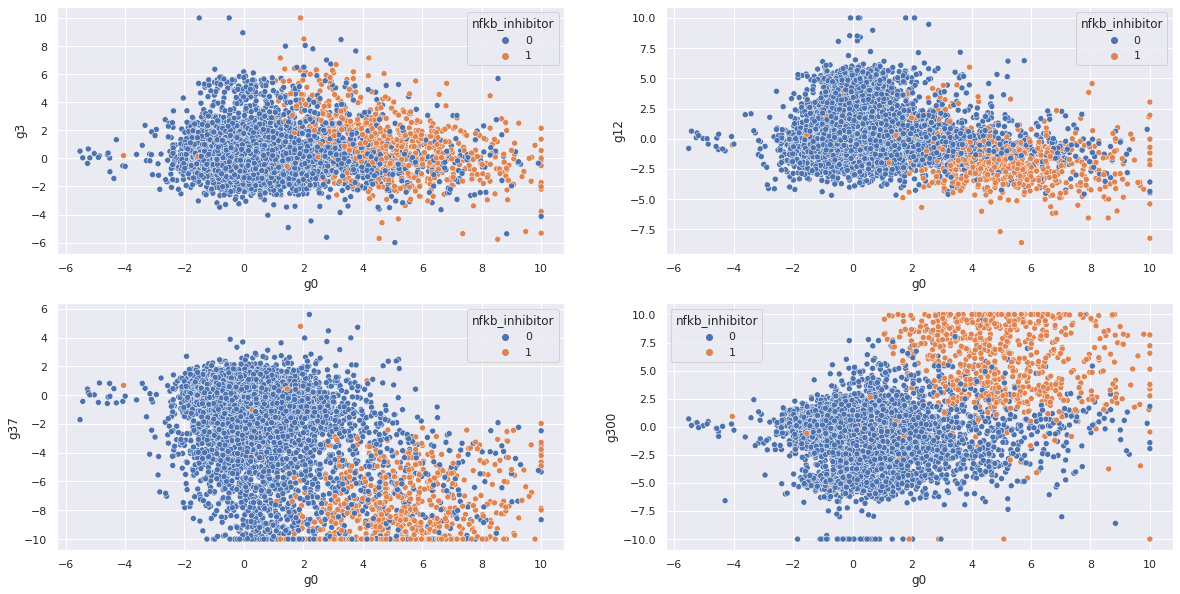

In [154]:
#abaixo são realizados os scatterplot's utilizando como resultado a classe do efeito 'nfkb_inhibitor' 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x='g0', y = 'g3', data=dados_Experimento_Resultado, hue='nfkb_inhibitor')
plt.subplot(2,2,2)
sns.scatterplot(x='g0', y = 'g12', data=dados_Experimento_Resultado, hue='nfkb_inhibitor')
plt.subplot(2,2,3)
sns.scatterplot(x='g0', y = 'g37', data=dados_Experimento_Resultado, hue='nfkb_inhibitor')
plt.subplot(2,2,4)
sns.scatterplot(x='g0', y = 'g300', data=dados_Experimento_Resultado, hue='nfkb_inhibitor')

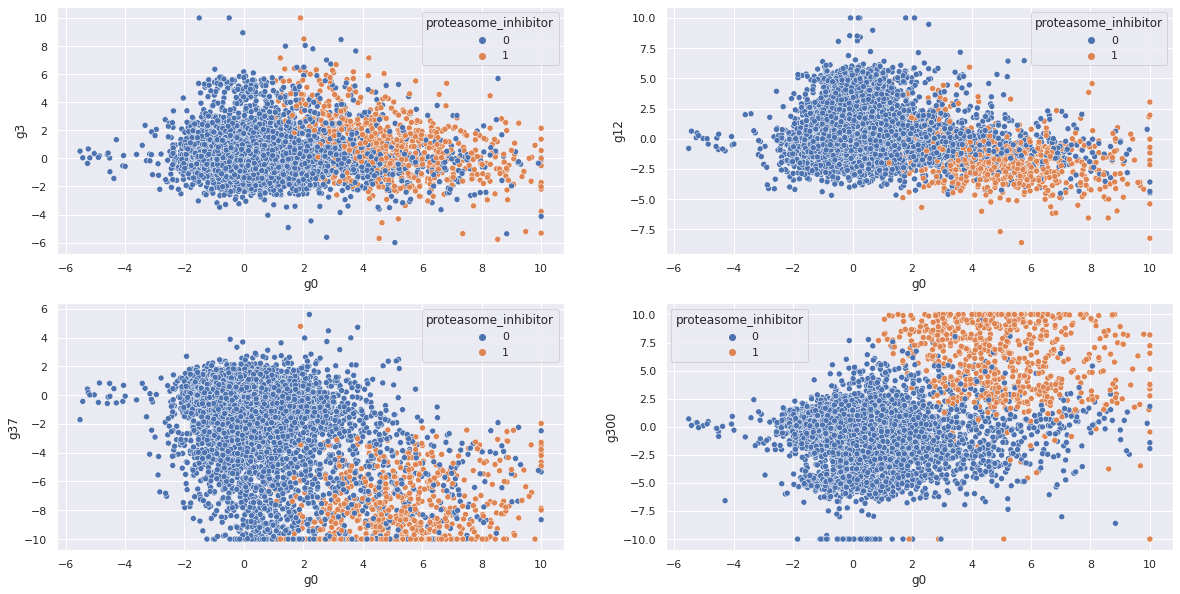

In [155]:
#abaixo são realizados os scatterplot's utilizando como resultado a classe do efeito 'proteasome_inhibitor' 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(x='g0', y = 'g3', data=dados_Experimento_Resultado, hue='proteasome_inhibitor')
plt.subplot(2,2,2)
sns.scatterplot(x='g0', y = 'g12', data=dados_Experimento_Resultado, hue='proteasome_inhibitor')
plt.subplot(2,2,3)
sns.scatterplot(x='g0', y = 'g37', data=dados_Experimento_Resultado, hue='proteasome_inhibitor')
plt.subplot(2,2,4)
sns.scatterplot(x='g0', y = 'g300', data=dados_Experimento_Resultado, hue='proteasome_inhibitor')

Por mais que as classes de efeitos 'proteasome_inhibitor' e 'nfkb_inhibitor' sejam bastante desbalanceadas como vimos em tópicos anteriores neste notebook. Ao exibir os valores dessas classes na relação entre dois genes aleatórios, podemos perceber que a maioria de valores '0' da classe e a maioria dos valores '1' podem ser visualizados em sessões do plano em que os valores estão sendo exibidos.  
Isso pode significar que estamos lidando com classes "separáveis" de forma mais simples o que facilita a criação de um modelo. o parâmetro visual é uma ferrmenta interessante para estudar o comportamento de nossas variáveis perante uma saída já conhecida mas não necessariamente traz a certeza do modelo.  
Nos próximos tópicos do notebook iremos tratar da criação de dois modelos de machine learning para tentar prever 'proteasome_inhibitor' e 'nfkb_inhibitor' e testar nossa hipótese de que os valores das **expressões gênicas podem prever o efeito de uma droga.**